<a href="https://colab.research.google.com/github/sur-sakthy/da-dm-project/blob/main/eda_and_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load in cleaned and merged dataset between 2014-2021 

'IPDC Waiting List By Group Hospital 2014.csv'
'IPDC Waiting List By Group Hospital 2015.csv'
'IPDC Waiting List By Group Hospital 2016.csv'
'IPDC Waiting List By Group Hospital 2017.csv'
'IPDC Waiting List By Group Hospital 2018.csv'
'IPDC Waiting List By Group Hospital 2019.csv'
'IPDC Waiting List By Group Hospital 2020.csv'
'IPDC Waiting List By Group Hospital 2021.csv'
 merged.csv

# New Section

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#data mining and regression basic packages 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import os 
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read the merged file from merged.csv

In [ ]:
#merged- https://drive.google.com/file/d/1BOaqbKSkuKxoJ64oM1PfJhUsOT6z7cgS/view?usp=sharing
downloaded = drive.CreateFile({'id':'1BOaqbKSkuKxoJ64oM1PfJhUsOT6z7cgS'}) 
downloaded.GetContentFile('merged.csv')  
data = pd.read_csv('merged.csv', parse_dates=['Archive Date'])
print(data.head()) #365067 rows × 11 columns

  Archive Date                      Group  Hospital HIPE  \
0   2014-01-30  Children's Hospital Group            940   
1   2014-01-30  Children's Hospital Group            940   
2   2014-01-30  Children's Hospital Group            940   
3   2014-01-30  Children's Hospital Group            940   
4   2014-01-30  Children's Hospital Group            940   

                                      Hospital  Specialty HIPE  \
0  Childrens University Hospital Temple Street               0   
1  Childrens University Hospital Temple Street               0   
2  Childrens University Hospital Temple Street               0   
3  Childrens University Hospital Temple Street               0   
4  Childrens University Hospital Temple Street             600   

                   Specialty  Case Type Adult/Child Age Categorisation  \
0  Small Volume Specialities   Day Case       Child               0-15   
1  Small Volume Specialities   Day Case       Child               0-15   
2  Small Volume Spec

In [ ]:
data.dtypes

Archive Date          datetime64[ns]
Group                         object
Hospital HIPE                  int64
Hospital                      object
Specialty HIPE                 int64
Specialty                     object
Case Type                     object
Adult/Child                   object
Age Categorisation            object
Time Bands                    object
Count                          int64
dtype: object

# Is there any missing data?

In [ ]:
data.info() # we do not have any missing data found 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365067 entries, 0 to 365066
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Archive Date        365067 non-null  datetime64[ns]
 1   Group               365067 non-null  object        
 2   Hospital HIPE       365067 non-null  int64         
 3   Hospital            365067 non-null  object        
 4   Specialty HIPE      365067 non-null  int64         
 5   Specialty           365067 non-null  object        
 6   Case Type           365067 non-null  object        
 7   Adult/Child         365067 non-null  object        
 8   Age Categorisation  365067 non-null  object        
 9   Time Bands          365067 non-null  object        
 10  Count               365067 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 30.6+ MB


In [ ]:
data.describe().transpose()

count         mean          std  min     25%     50%  \
Hospital HIPE   365067.0   728.280485   292.827708  0.0   501.0   802.0   
Specialty HIPE  365067.0  2825.732928  2448.018876  0.0  1503.0  2000.0   
Count           365067.0    17.213339    33.532323  1.0     2.0     5.0   

                   75%     max  
Hospital HIPE    915.0  1270.0  
Specialty HIPE  2603.0  8800.0  
Count             17.0   799.0

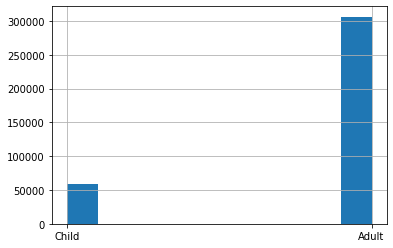

In [ ]:
data['Adult/Child'].hist()

In [ ]:
#How many unique speciality are there? 
data['Specialty'].unique() # 3 types found 

array(['Small Volume Specialities', 'Otolaryngology (ENT)', 'Neurology',
       'Orthopaedics', 'Paediatrics', 'Paediatric Respiratory Medicine',
       'Plastic Surgery', 'Nephrology', 'Dental Surgery',
       'Paediatric Surgery', 'Urology', 'Dermatology', 'Ophthalmology',
       'Paed Cardiology', 'Maxillo-Facial', 'Respiratory Medicine',
       'Rheumatology', 'General Surgery', 'Cardio-Thoracic Surgery',
       'Gynaecology', 'Cardiology', 'Geriatric Medicine',
       'Vascular Surgery', 'Anaesthetics', 'Pain Relief',
       'Paediatric ENT', 'Gastro-Enterology', 'Haematology',
       'Obstetrics/Gynaecology', 'General Medicine', 'Radiology',
       'Neurosurgery', 'Clinical Immunology', 'Endocrinology',
       'Oral Surgery', 'Gastro-Intestinal Surgery',
       'Hepato-Biliary Surgery', 'Paed Orthopaedic',
       'Palliative Medicine', 'Obstetrics', 'Breast Surgery',
       'Paed Gastro-Enterol', 'Paed Oncology', 'Metabolic Medicine',
       'Oncology', 'Immunology', 'Paed Haemat

In [ ]:
data['Time Bands'].unique()

array([' 0-3 Months', ' 3-6 Months', ' 6-9 Months', ' 9-12 Months',
       '12-15 Months', '15-18 Months', '18+ Months', '  6-9 Months',
       '  9-12 Months', '  3-6 Months', ' 12-15 Months', '  0-3 Months',
       ' 15-18 Months'], dtype=object)

In [ ]:
data['Time Bands'] = data['Time Bands'].str.strip()
data['Time Bands'].unique()

array(['0-3 Months', '3-6 Months', '6-9 Months', '9-12 Months',
       '12-15 Months', '15-18 Months', '18+ Months'], dtype=object)

In [ ]:
data['Archive Date'].unique()

array(['2014-01-30T00:00:00.000000000', '2014-02-27T00:00:00.000000000',
       '2014-03-27T00:00:00.000000000', '2014-04-29T00:00:00.000000000',
       '2014-05-29T00:00:00.000000000', '2014-06-26T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000', '2014-08-28T00:00:00.000000000',
       '2014-09-25T00:00:00.000000000', '2014-10-30T00:00:00.000000000',
       '2014-11-27T00:00:00.000000000', '2014-12-23T00:00:00.000000000',
       '2015-01-29T00:00:00.000000000', '2015-02-26T00:00:00.000000000',
       '2015-03-26T00:00:00.000000000', '2015-04-29T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-30T00:00:00.000000000',
       '2015-07-30T00:00:00.000000000', '2015-08-27T00:00:00.000000000',
       '2015-09-30T00:00:00.000000000', '2015-10-29T00:00:00.000000000',
       '2015-11-26T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-25T00:00:00.000000000',
       '2016-03-31T00:00:00.000000000', '2016-04-28

# Clean the data


In [ ]:
def filter_dataset(df, time_band):
  return df[df['Time Bands'] == time_band]

In [ ]:
def consolidate_data_per_month(df):
  # consolidate rows so that there is one row per date
  data = []

  for index, row in df.iterrows():
    index = next((index for (index, d) in enumerate(data) if pd.to_datetime(d['date']) == row['Archive Date']), None)
    if (index == None):
      data.append({'date': row['Archive Date'], 'patients': row['Count']})
    else:
      patients = data[index]['patients']
      patients = patients + row['Count']
      data[index]['patients'] = patients

  return pd.DataFrame(data)

In [ ]:
time_band_0_3_months = '0-3 Months'
time_band_3_6_months = '3-6 Months'
time_band_6_9_months = '6-9 Months'
time_band_9_12_months = '9-12 Months'
time_band_12_15_months = '12-15 Months'
time_band_15_18_months = '15-18 Months'
time_band_18_months = '18+ Months'

In [ ]:
# drop unused columns
drop_cols = ['Group', 'Hospital HIPE', 'Hospital', 'Specialty HIPE', 'Specialty', 'Case Type', 'Adult/Child', 'Age Categorisation']
data.drop(drop_cols, axis=1, inplace=True)

In [ ]:
data_0_3_months = consolidate_data_per_month(filter_dataset(data, time_band_0_3_months)).sort_values('date')

In [ ]:
data_3_6_months = consolidate_data_per_month(filter_dataset(data, time_band_3_6_months)).sort_values('date')

In [ ]:
data_6_9_months = consolidate_data_per_month(filter_dataset(data, time_band_6_9_months)).sort_values('date')

In [ ]:
data_9_12_months = consolidate_data_per_month(filter_dataset(data, time_band_9_12_months)).sort_values('date')

In [ ]:
data_12_15_months = consolidate_data_per_month(filter_dataset(data, time_band_12_15_months)).sort_values('date')

In [ ]:
data_15_18_months = consolidate_data_per_month(filter_dataset(data, time_band_15_18_months)).sort_values('date')

In [ ]:
data_18_months = consolidate_data_per_month(filter_dataset(data, time_band_18_months)).sort_values('date')

In [ ]:
data_0_3_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      87 non-null     datetime64[ns]
 1   patients  87 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [ ]:
data_0_3_months

date  patients
0  2014-01-30     24473
1  2014-02-27     24035
2  2014-03-27     23288
3  2014-04-29     24382
4  2014-05-29     23635
..        ...       ...
82 2020-11-26     26630
83 2020-12-23     27807
84 2021-01-28     29113
85 2021-02-25     25521
86 2021-03-25     22162

[87 rows x 2 columns]

# Data Visualisation

In [ ]:
def plot(df, time_band):
  df.plot(x='date', 
              y='patients', 
              kind='line', 
              figsize=(17, 10), 
              grid=True, 
              title='Number of patients for specialty Gynaecology on the waiting list time-band ' + time_band,
              xlabel='Date',
              ylabel='Count of patients')

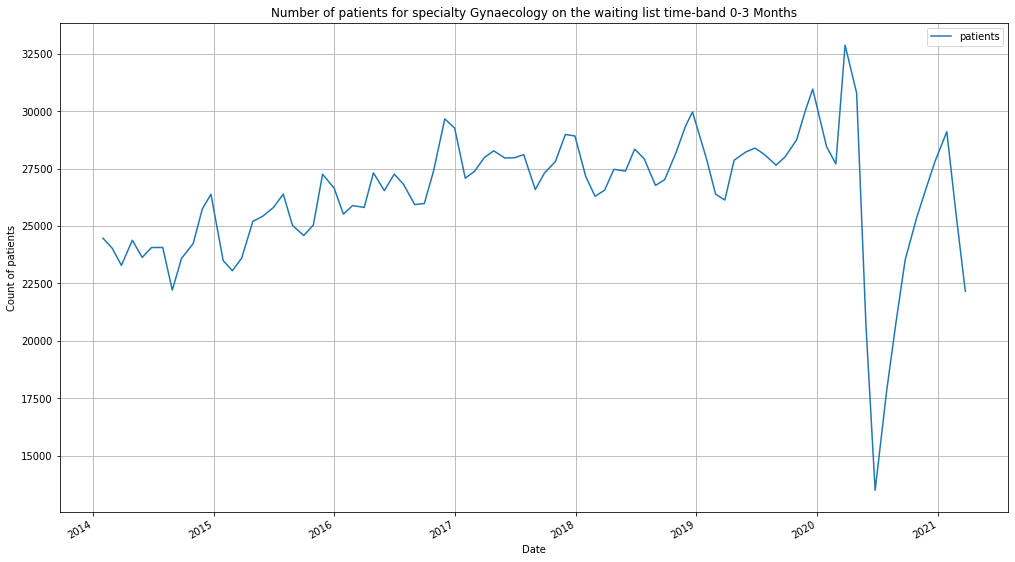

In [ ]:
plot(data_0_3_months, time_band_0_3_months)

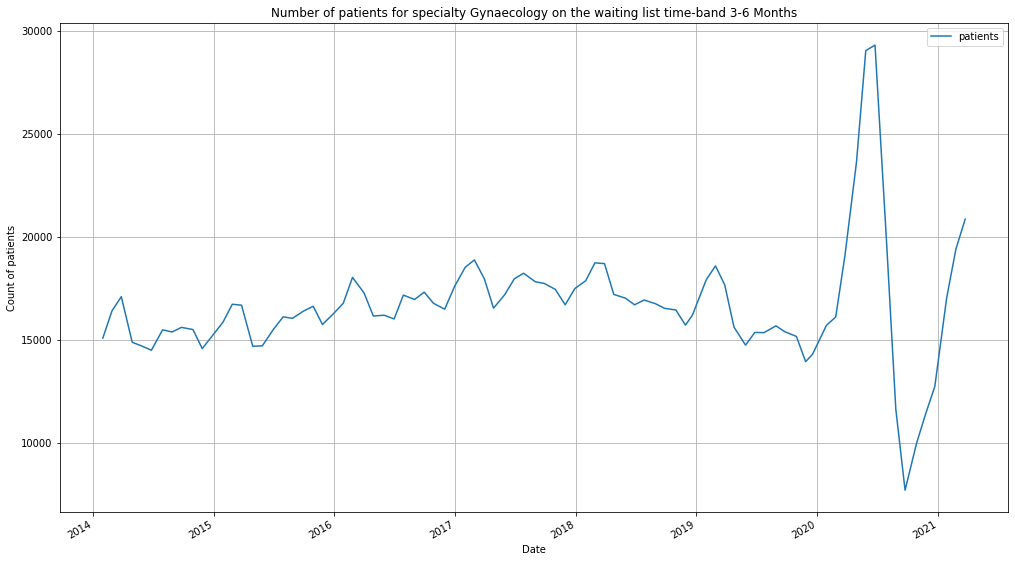

In [ ]:
plot(data_3_6_months, time_band_3_6_months)

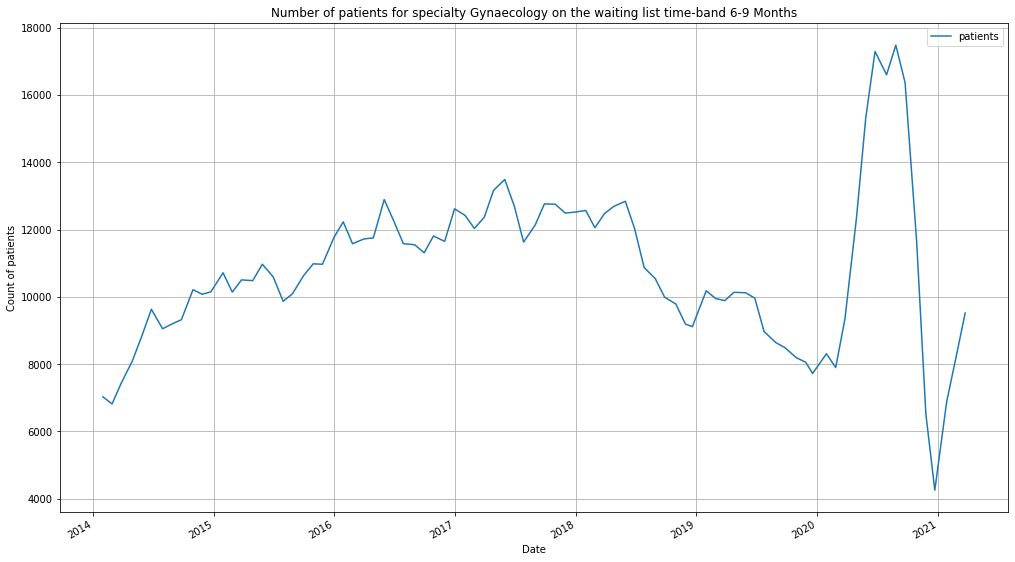

In [ ]:
plot(data_6_9_months, time_band_6_9_months)

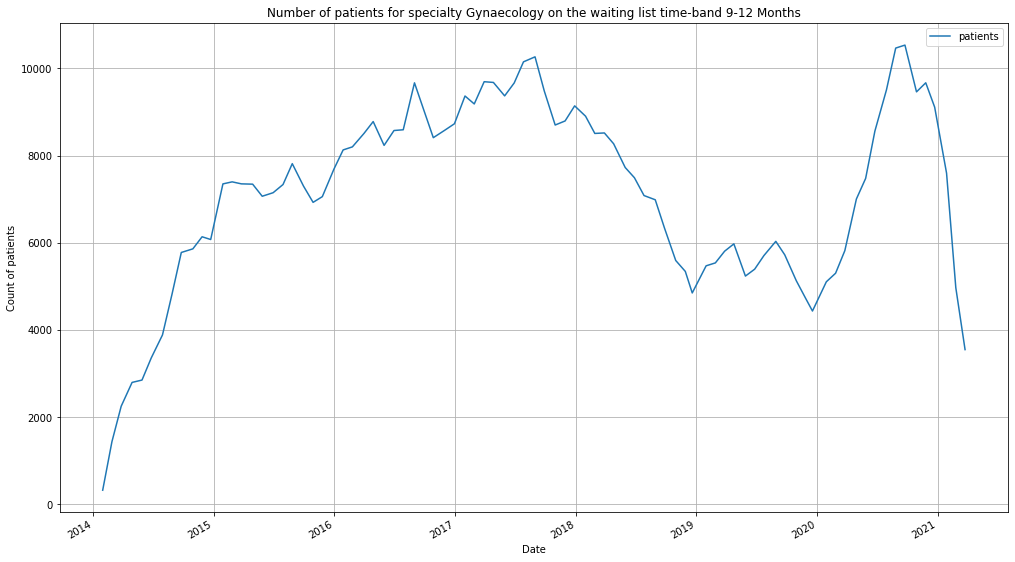

In [ ]:
plot(data_9_12_months, time_band_9_12_months)

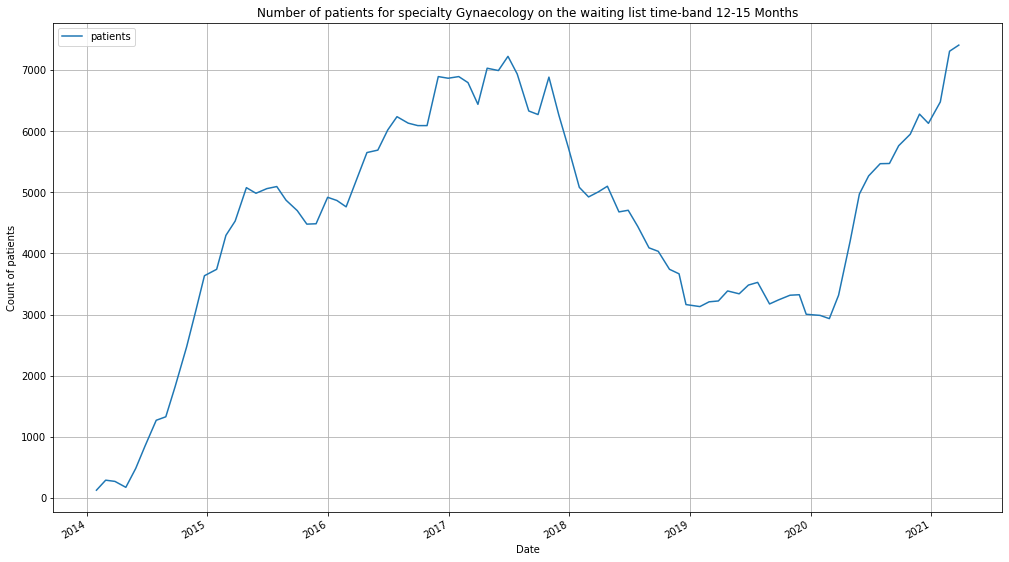

In [ ]:
plot(data_12_15_months, time_band_12_15_months)

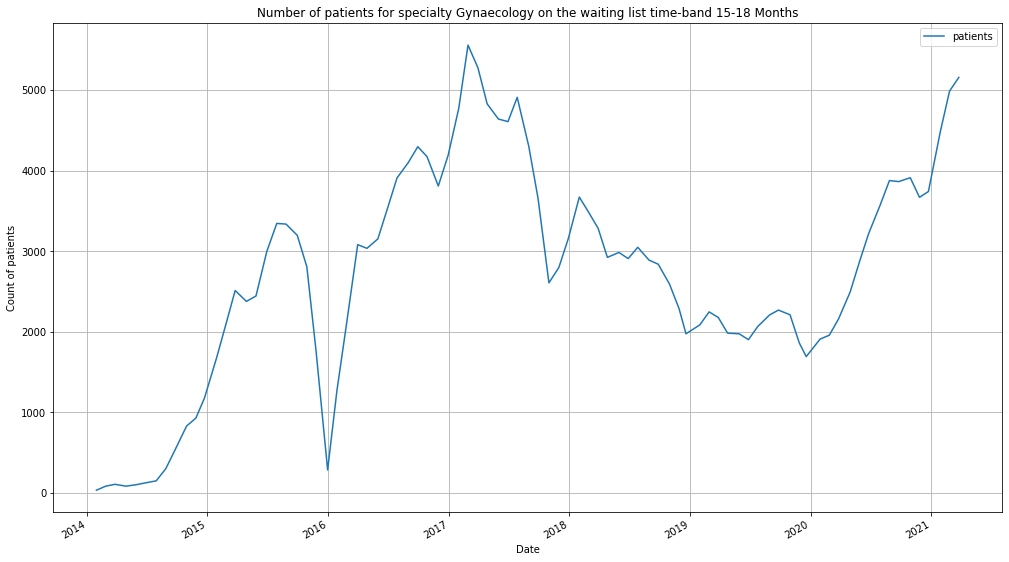

In [ ]:
plot(data_15_18_months, time_band_15_18_months)

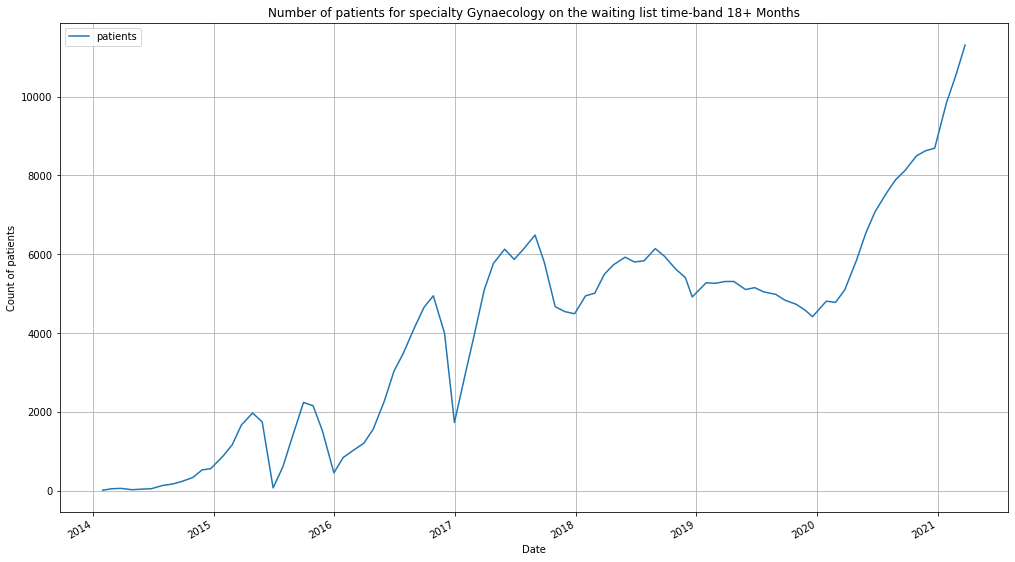

In [ ]:
plot(data_18_months, time_band_18_months)

## Aggregated plot


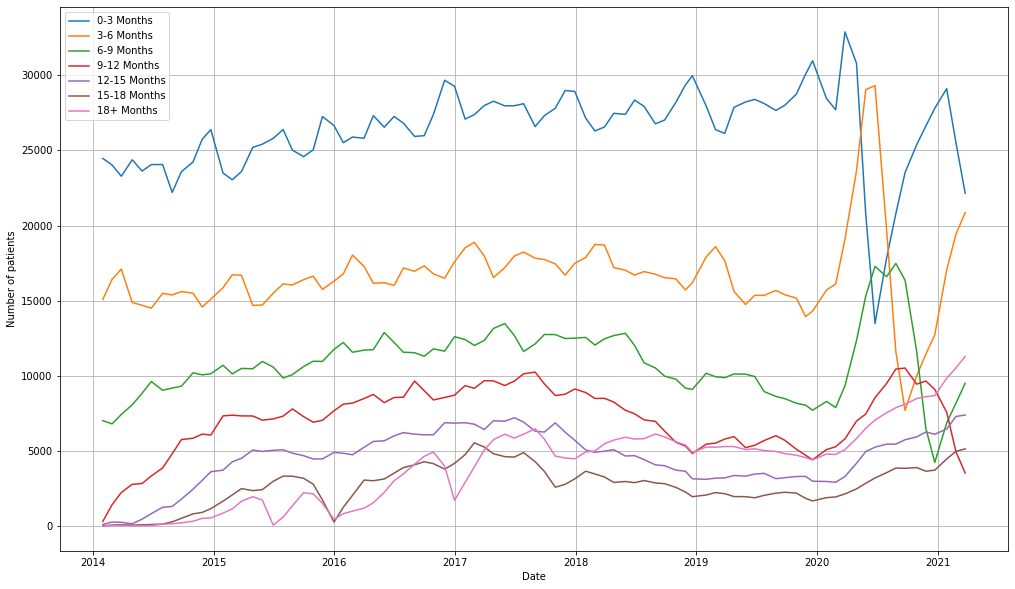

In [ ]:
# plot lines
plt.rcParams['figure.figsize'] = [17, 10]
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of patients')
plt.plot(data_0_3_months['date'], data_0_3_months['patients'], label = "0-3 Months")
plt.plot(data_3_6_months['date'], data_3_6_months['patients'], label = "3-6 Months")
plt.plot(data_6_9_months['date'], data_6_9_months['patients'], label = "6-9 Months")
plt.plot(data_9_12_months['date'], data_9_12_months['patients'], label = "9-12 Months")
plt.plot(data_12_15_months['date'], data_12_15_months['patients'], label = "12-15 Months")
plt.plot(data_15_18_months['date'], data_15_18_months['patients'], label = "15-18 Months")
plt.plot(data_18_months['date'], data_18_months['patients'], label = "18+ Months")
plt.legend()
plt.show()

## Moving Average

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    plt.plot(rolling_std, label='Rolling standard deviation trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

In [ ]:
format = '%Y-%m-%d'

### 0-3 Months

In [ ]:
# index the date column
data_0_3_months = data_0_3_months.set_index(pd.DatetimeIndex(pd.to_datetime(data_0_3_months['date'], format=format)))
data_0_3_months.drop('date', axis=1, inplace=True)
data_0_3_months

patients
date                
2014-01-30     24473
2014-02-27     24035
2014-03-27     23288
2014-04-29     24382
2014-05-29     23635
...              ...
2020-11-26     26630
2020-12-23     27807
2021-01-28     29113
2021-02-25     25521
2021-03-25     22162

[87 rows x 1 columns]

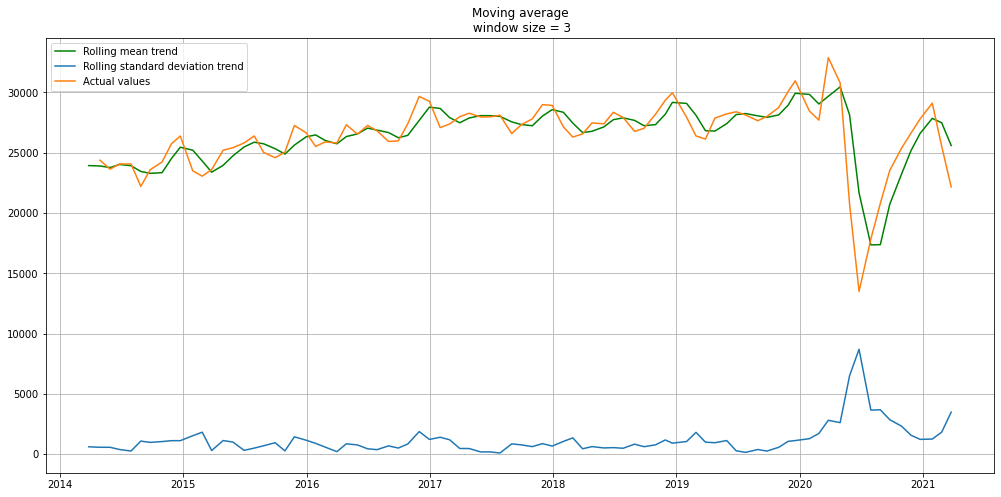

In [ ]:
# smooth by the previous previous quarter (3 months)
plot_moving_average(data_0_3_months['patients'], 3)

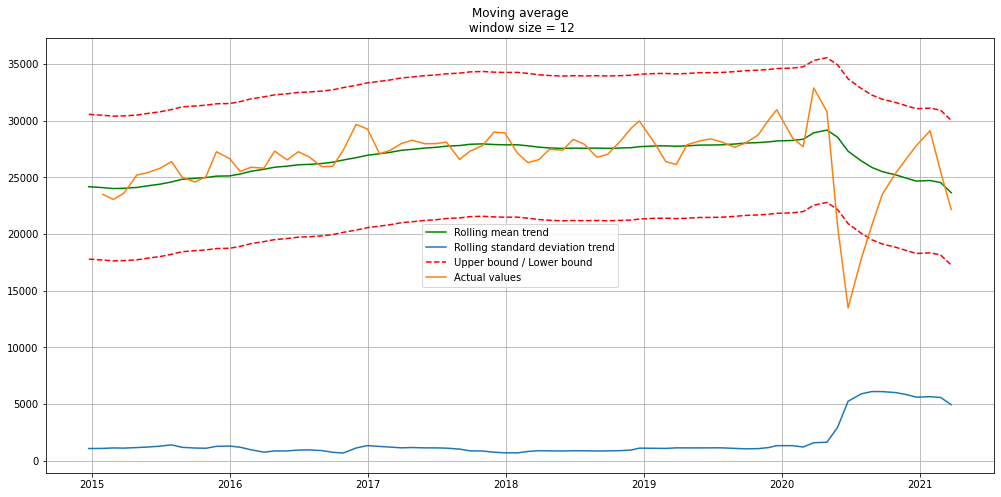

In [ ]:
# smooth by previous year (12 months)
plot_moving_average(data_0_3_months['patients'], 12, plot_intervals=True)

### 3-6 Months

In [ ]:
# index the date column
data_3_6_months = data_3_6_months.set_index(pd.DatetimeIndex(pd.to_datetime(data_3_6_months['date'], format=format)))
data_3_6_months.drop('date', axis=1, inplace=True)
data_3_6_months

patients
date                
2014-01-30     15098
2014-02-27     16426
2014-03-27     17108
2014-04-29     14894
2014-05-29     14707
...              ...
2020-11-26     11455
2020-12-23     12745
2021-01-28     17051
2021-02-25     19422
2021-03-25     20869

[87 rows x 1 columns]

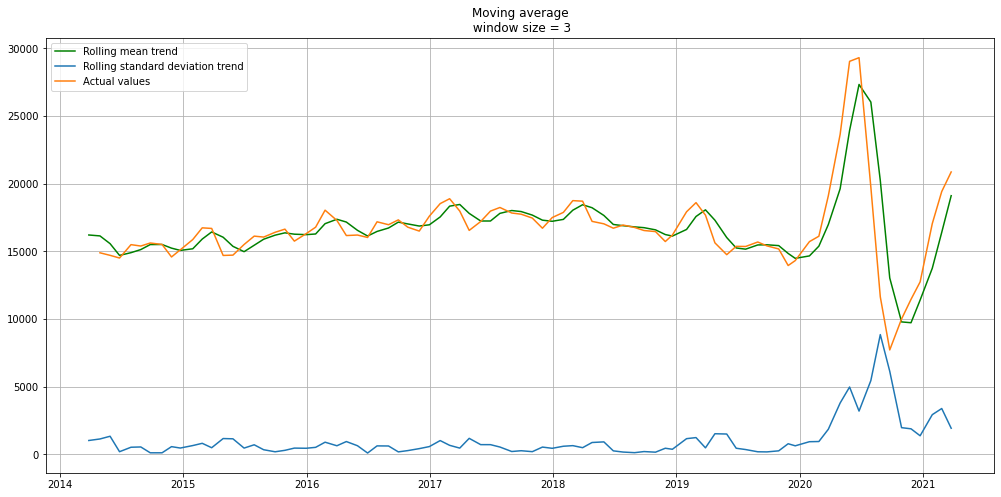

In [ ]:
# smooth by the previous previous quarter (3 months)
plot_moving_average(data_3_6_months['patients'], 3)

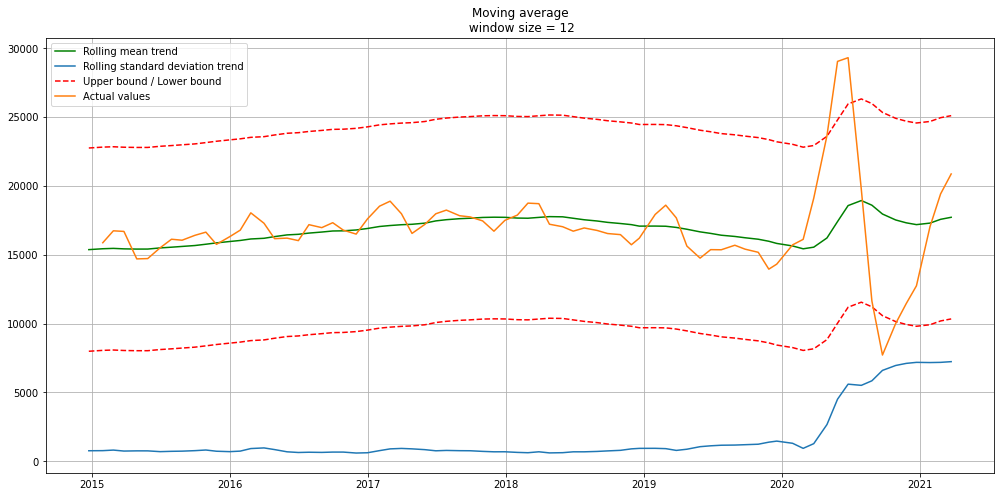

In [ ]:
# smooth by previous year (12 months)
plot_moving_average(data_3_6_months['patients'], 12, plot_intervals=True)

### 6-9 Months

In [ ]:
# index the date column
data_6_9_months = data_6_9_months.set_index(pd.DatetimeIndex(pd.to_datetime(data_6_9_months['date'], format=format)))
data_6_9_months.drop('date', axis=1, inplace=True)
data_6_9_months

patients
date                
2014-01-30      7031
2014-02-27      6819
2014-03-27      7443
2014-04-29      8087
2014-05-29      8861
...              ...
2020-11-26      6513
2020-12-23      4254
2021-01-28      6884
2021-02-25      8192
2021-03-25      9521

[87 rows x 1 columns]

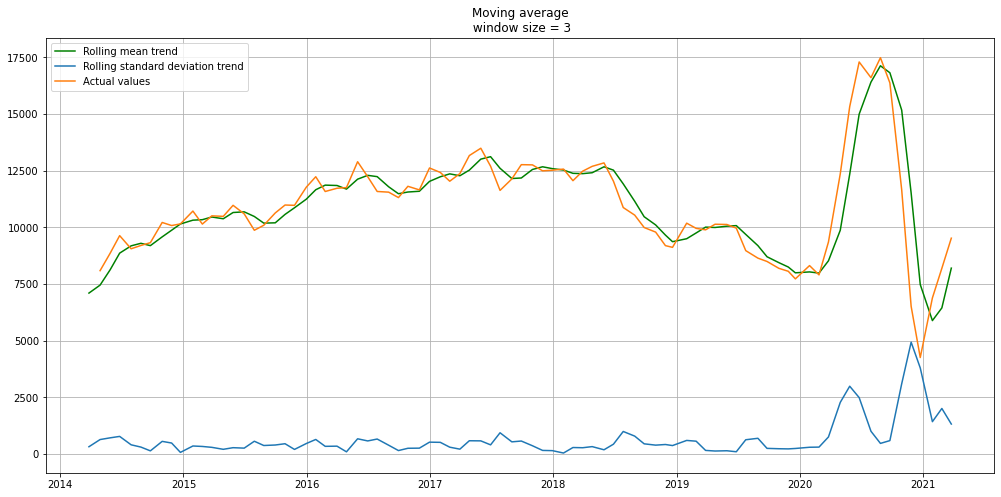

In [ ]:
# smooth by the previous previous quarter (3 months)
plot_moving_average(data_6_9_months['patients'], 3)

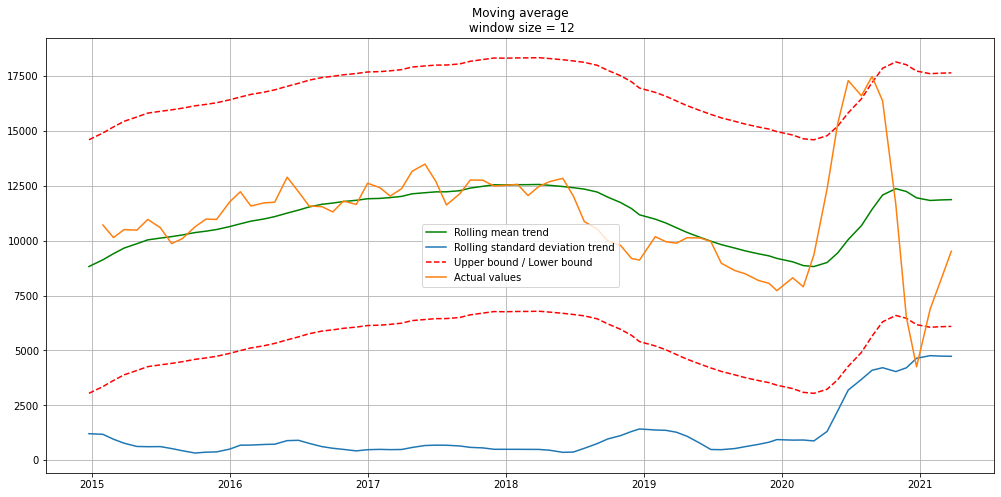

In [ ]:
# smooth by previous year (12 months)
plot_moving_average(data_6_9_months['patients'], 12, plot_intervals=True)

### 9-12 Months

In [ ]:
# index the date column
data_9_12_months = data_9_12_months.set_index(pd.DatetimeIndex(pd.to_datetime(data_9_12_months['date'], format=format)))
data_9_12_months.drop('date', axis=1, inplace=True)
data_9_12_months

patients
date                
2014-01-30       327
2014-02-27      1440
2014-03-27      2252
2014-04-29      2798
2014-05-29      2852
...              ...
2020-11-26      9667
2020-12-23      9108
2021-01-28      7595
2021-02-25      4969
2021-03-25      3550

[87 rows x 1 columns]

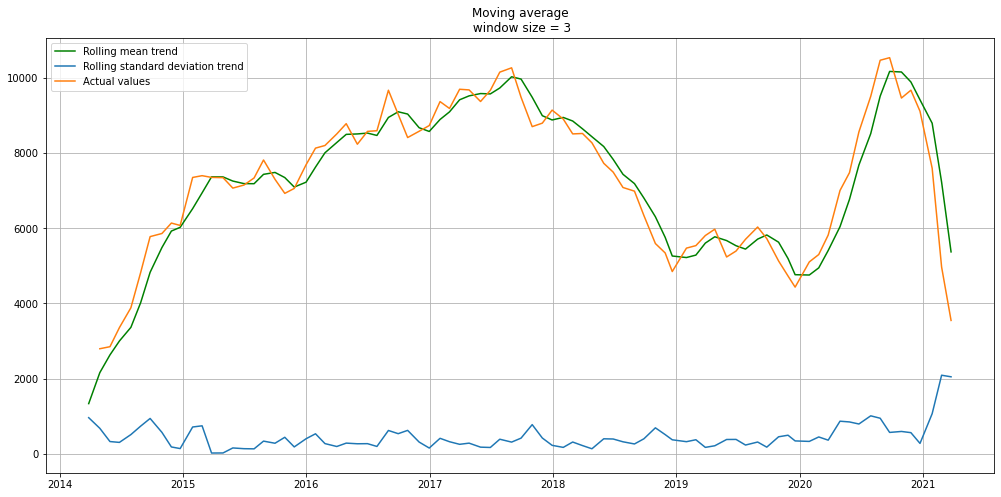

In [ ]:
# smooth by the previous previous quarter (3 months)
plot_moving_average(data_9_12_months['patients'], 3)

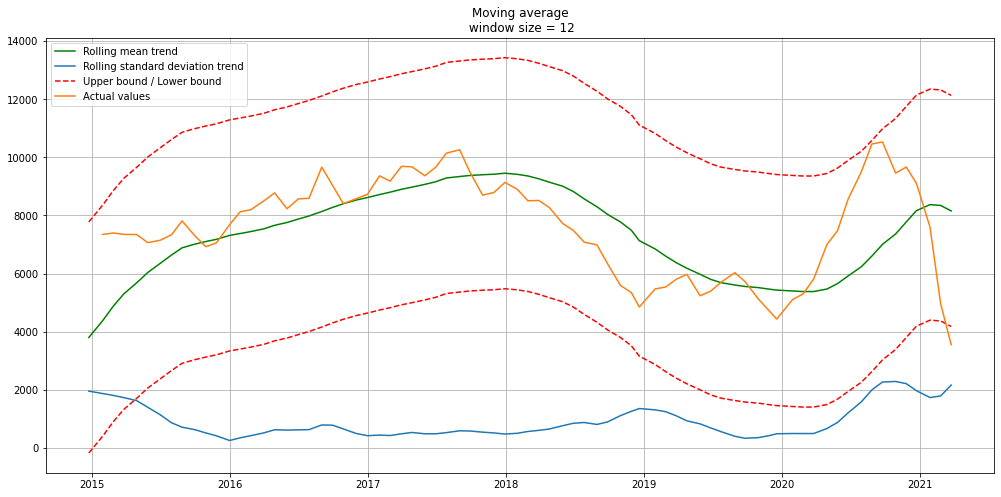

In [ ]:
# smooth by previous year (12 months)
plot_moving_average(data_9_12_months['patients'], 12, plot_intervals=True)

### 12-15 Months

In [ ]:
# index the date column
data_12_15_months = data_12_15_months.set_index(pd.DatetimeIndex(pd.to_datetime(data_12_15_months['date'], format=format)))
data_12_15_months.drop('date', axis=1, inplace=True)
data_12_15_months

patients
date                
2014-01-30       127
2014-02-27       291
2014-03-27       271
2014-04-29       174
2014-05-29       484
...              ...
2020-11-26      6280
2020-12-23      6129
2021-01-28      6479
2021-02-25      7309
2021-03-25      7409

[87 rows x 1 columns]

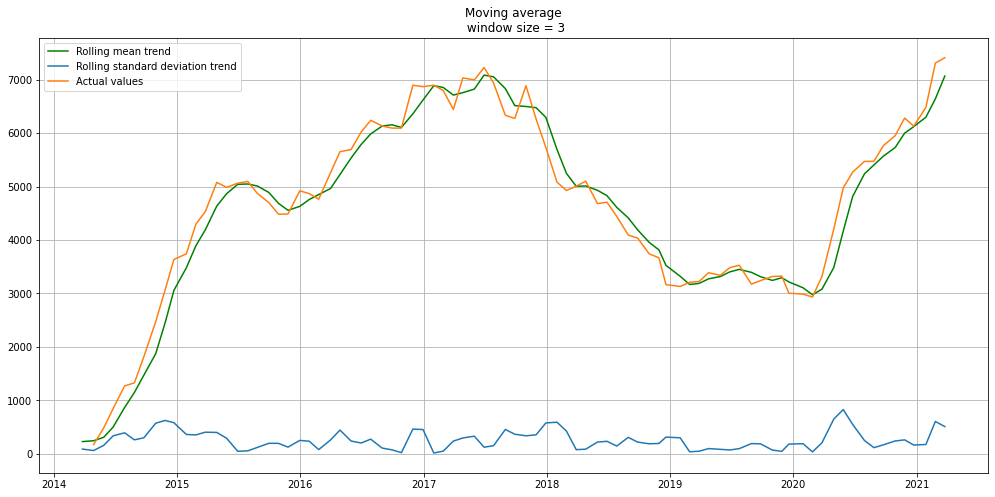

In [ ]:
# smooth by the previous previous quarter (3 months)
plot_moving_average(data_12_15_months['patients'], 3)

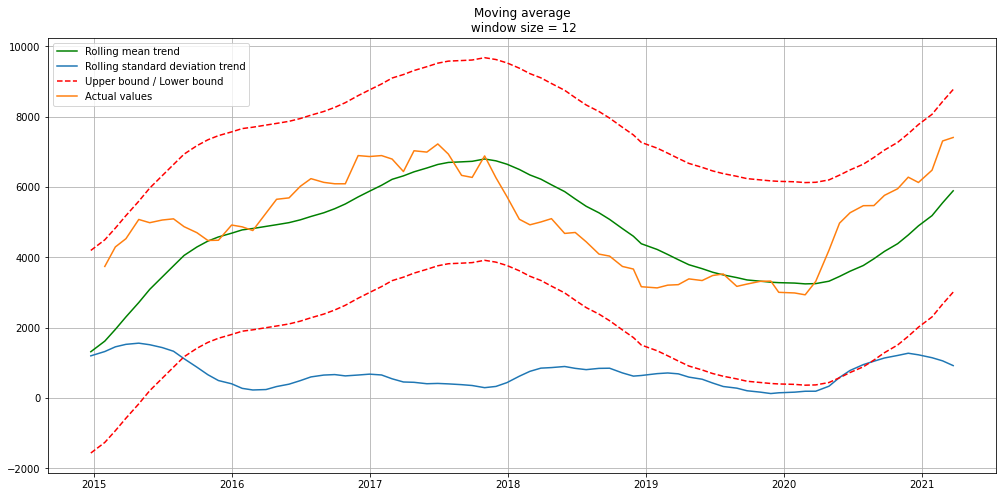

In [ ]:
# smooth by previous year (12 months)
plot_moving_average(data_12_15_months['patients'], 12, plot_intervals=True)

### 15-18 Months

In [ ]:
# index the date column
data_15_18_months = data_15_18_months.set_index(pd.DatetimeIndex(pd.to_datetime(data_15_18_months['date'], format=format)))
data_15_18_months.drop('date', axis=1, inplace=True)
data_15_18_months

patients
date                
2014-01-30        36
2014-02-27        86
2014-03-27       109
2014-04-29        86
2014-05-29       103
...              ...
2020-11-26      3669
2020-12-23      3741
2021-01-28      4483
2021-02-25      4987
2021-03-25      5156

[87 rows x 1 columns]

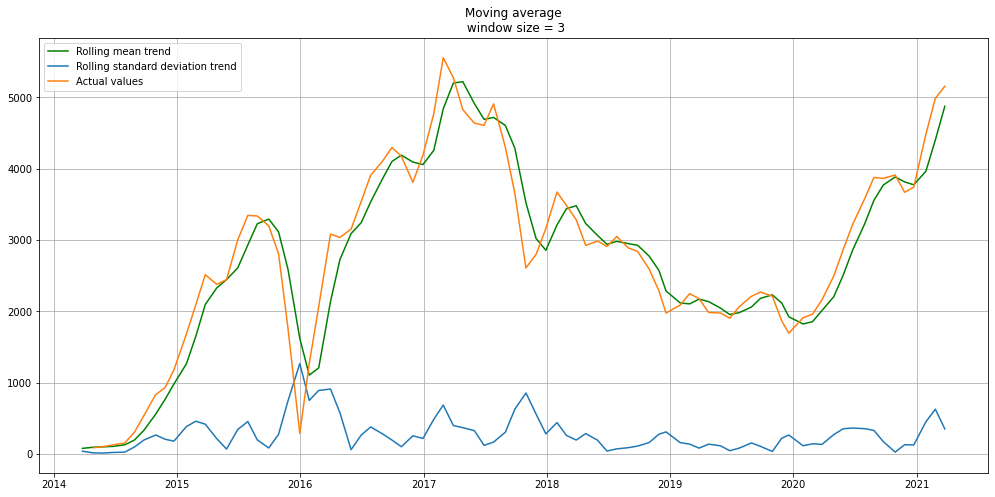

In [ ]:
# smooth by the previous previous quarter (3 months)
plot_moving_average(data_15_18_months['patients'], 3)

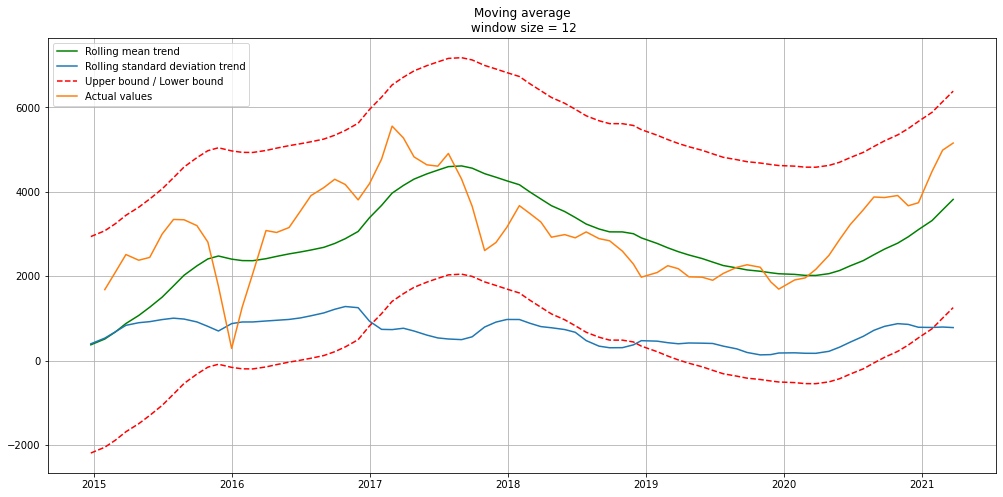

In [ ]:
# smooth by previous year (12 months)
plot_moving_average(data_15_18_months['patients'], 12, plot_intervals=True)

### 18+ Months

In [ ]:
# index the date column
data_18_months = data_18_months.set_index(pd.DatetimeIndex(pd.to_datetime(data_18_months['date'], format=format)))
data_18_months.drop('date', axis=1, inplace=True)
data_18_months

patients
date                
2014-01-30        20
2014-02-27        57
2014-03-27        66
2014-04-29        32
2014-05-29        47
...              ...
2020-11-26      8629
2020-12-23      8691
2021-01-28      9851
2021-02-25     10536
2021-03-25     11306

[87 rows x 1 columns]

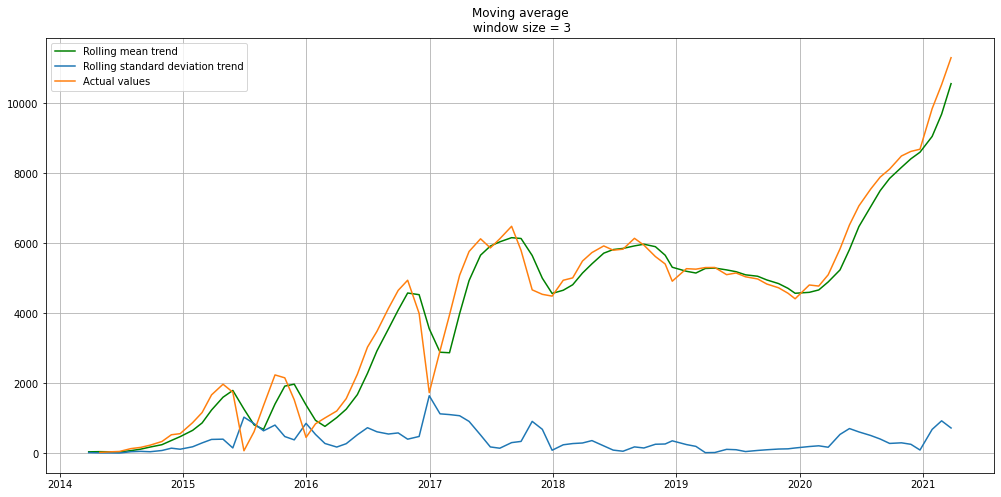

In [ ]:
# smooth by the previous previous quarter (3 months)
plot_moving_average(data_18_months['patients'], 3)

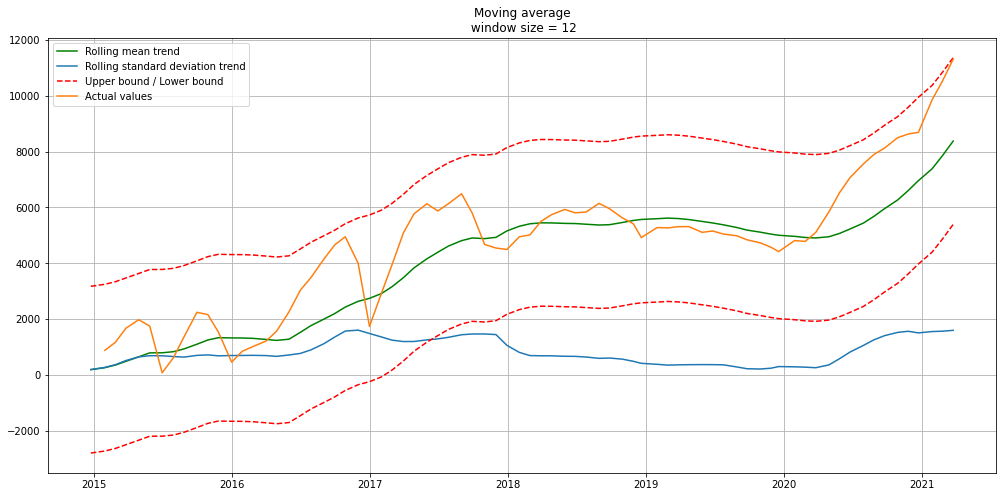

In [ ]:
# smooth by previous year (12 months)
plot_moving_average(data_18_months['patients'], 12, plot_intervals=True)

## Exponential smoothing

In [ ]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);


### 0-3 Months

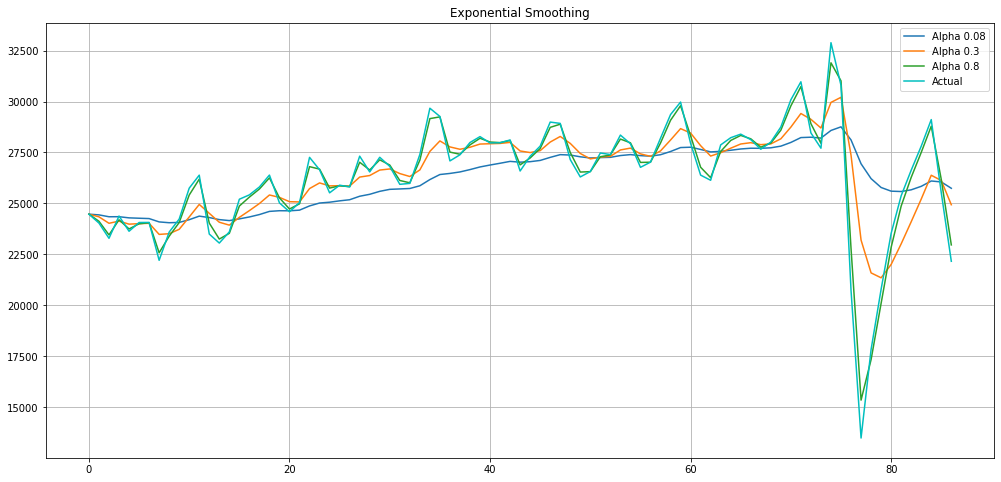

In [ ]:
plot_exponential_smoothing(data_0_3_months['patients'], [0.08, 0.3, 0.8])

### 3-6 Months

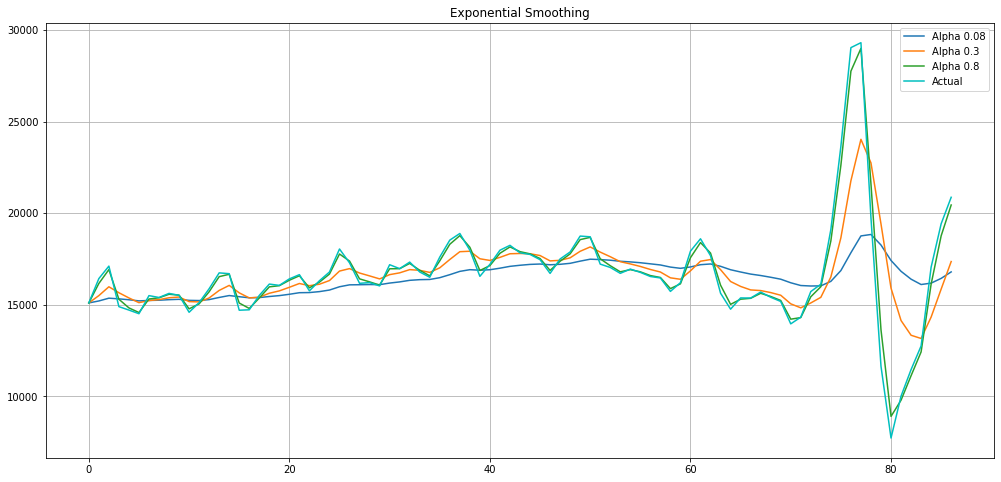

In [ ]:
plot_exponential_smoothing(data_3_6_months['patients'], [0.08, 0.3, 0.8])

### 6-9 Months

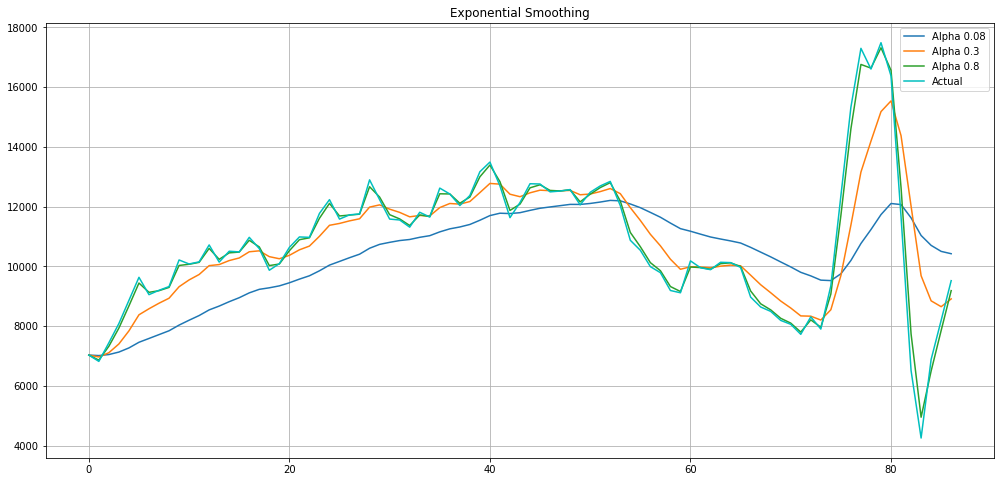

In [ ]:
plot_exponential_smoothing(data_6_9_months['patients'], [0.08, 0.3, 0.8])

### 9-12 Months

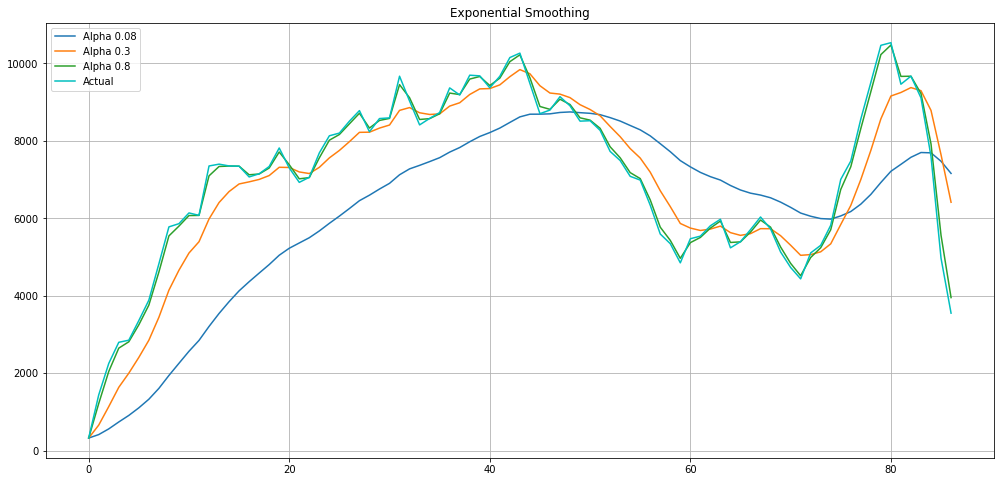

In [ ]:
plot_exponential_smoothing(data_9_12_months['patients'], [0.08, 0.3, 0.8])

### 12-15 Months

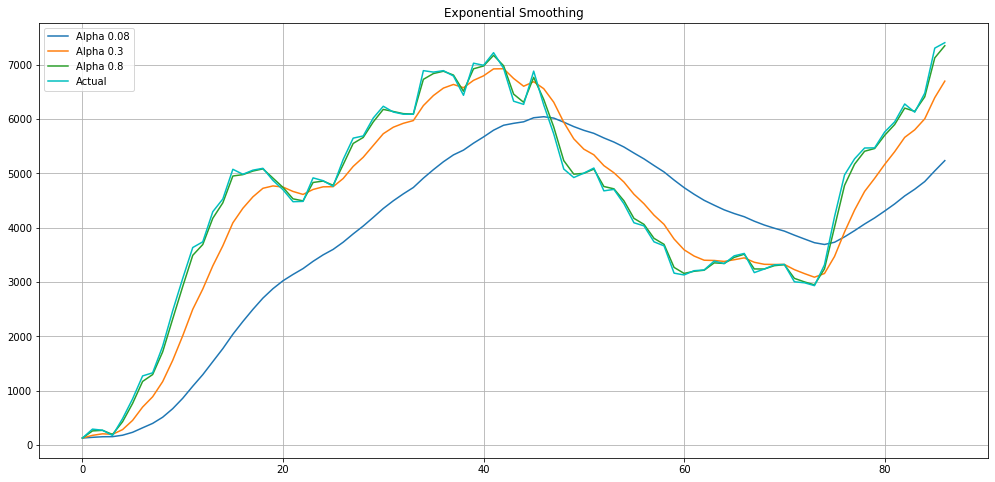

In [ ]:
plot_exponential_smoothing(data_12_15_months['patients'], [0.08, 0.3, 0.8])

### 15-18 Months

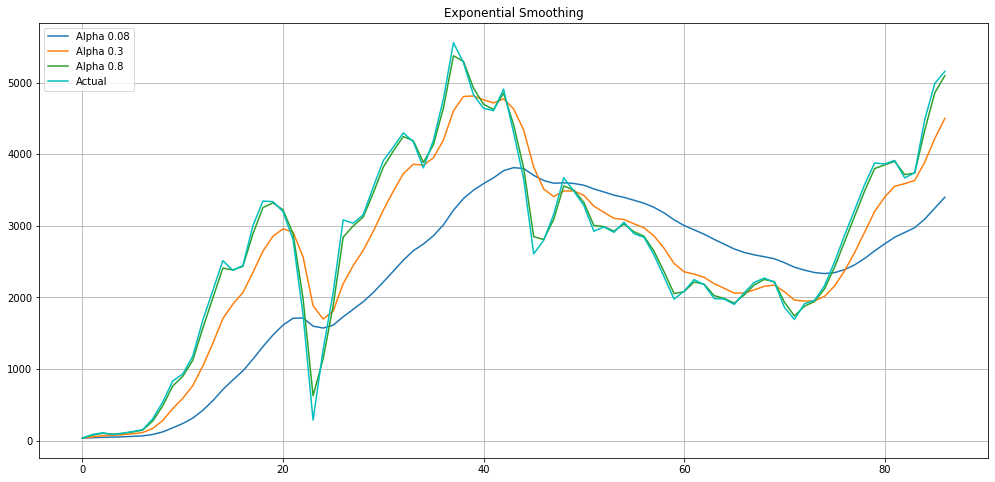

In [ ]:
plot_exponential_smoothing(data_15_18_months['patients'], [0.08, 0.3, 0.8])

### 18+ Months

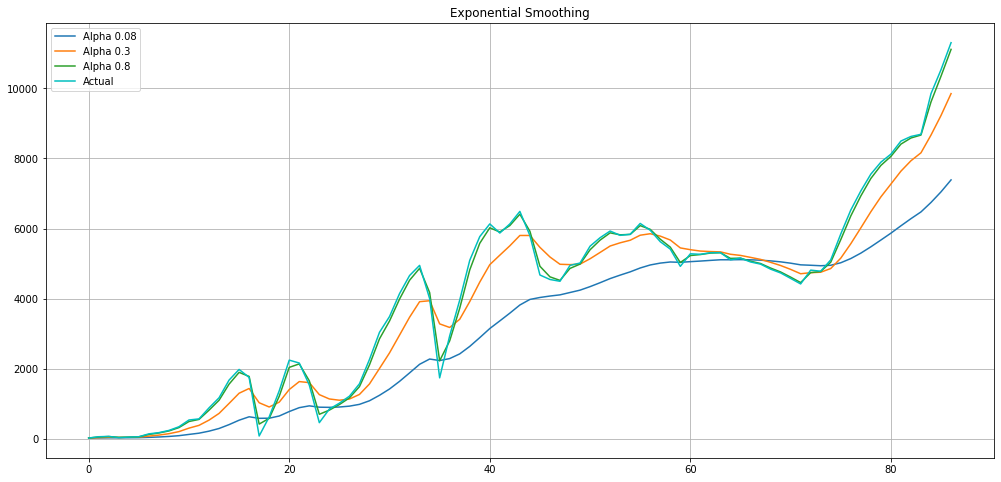

In [ ]:
plot_exponential_smoothing(data_18_months['patients'], [0.08, 0.3, 0.8])

## ETSD (Error Trend Seasonality Decomposition) 

### 0-3 Months

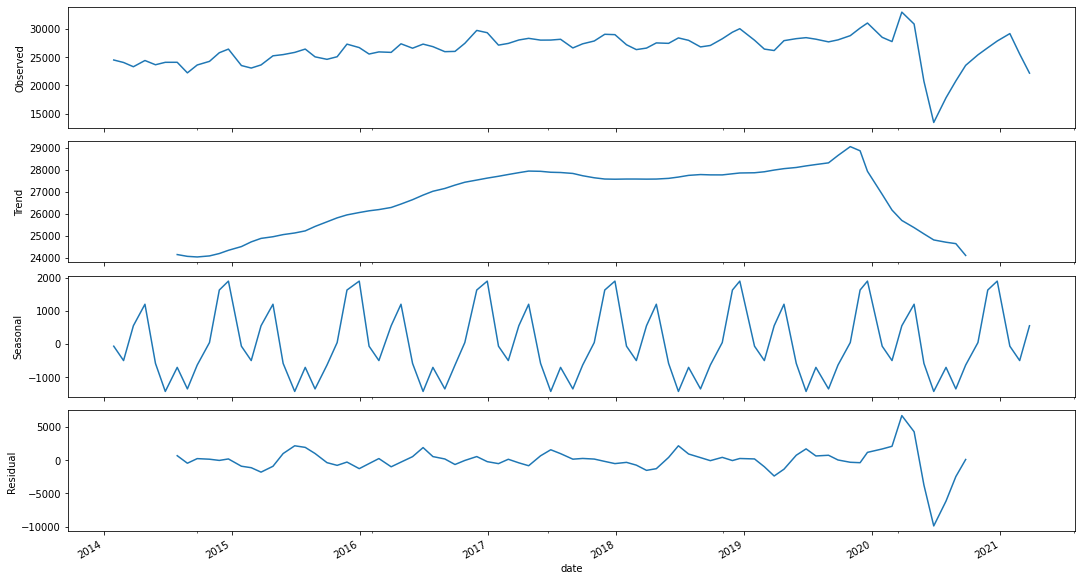

In [ ]:
decomp = seasonal_decompose(data_0_3_months['patients'], freq=12)
fig = decomp.plot()
fig.set_size_inches(15, 8)

### 3-6 Months

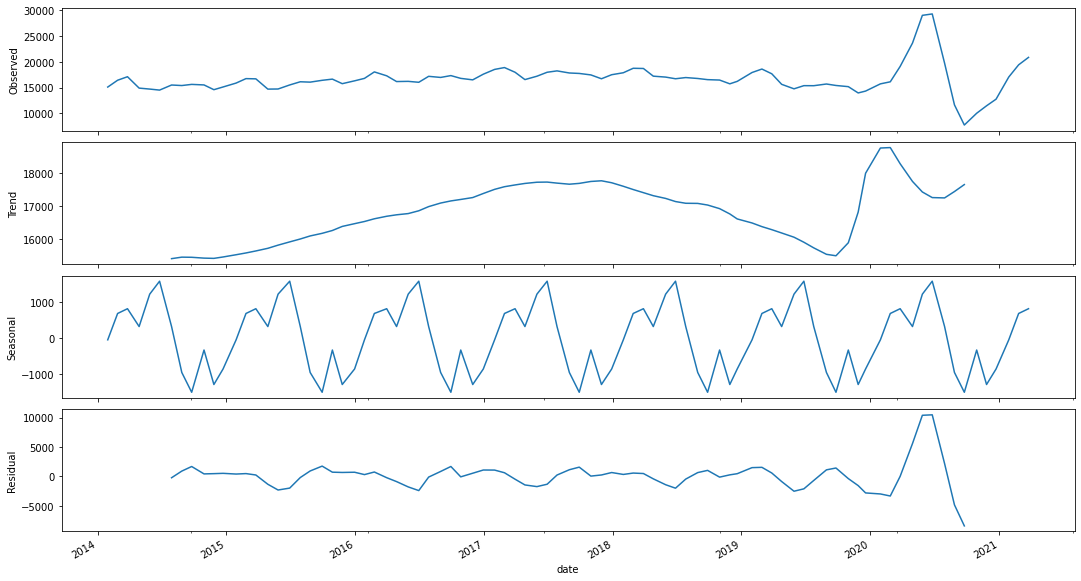

In [ ]:
decomp = seasonal_decompose(data_3_6_months['patients'], freq=12)
fig = decomp.plot()
fig.set_size_inches(15, 8)

### 6-9 Months

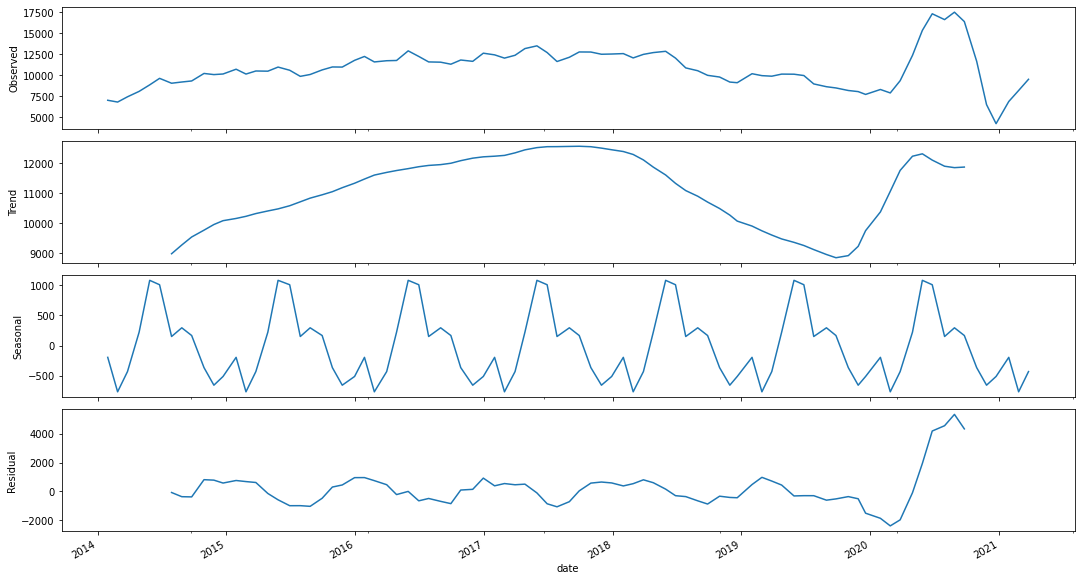

In [ ]:
decomp = seasonal_decompose(data_6_9_months['patients'], freq=12)
fig = decomp.plot()
fig.set_size_inches(15, 8)

### 9-12 Months

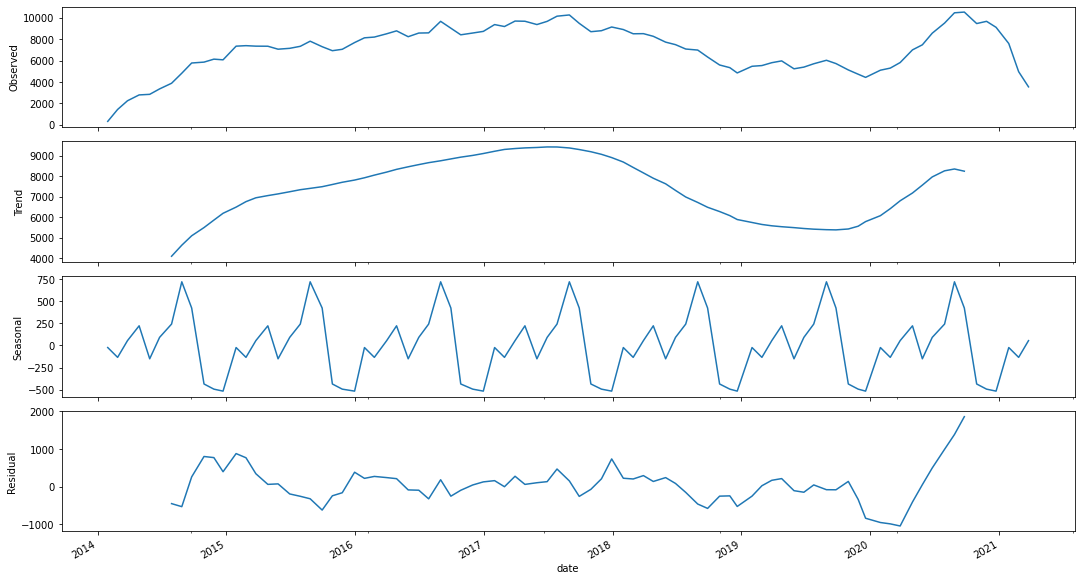

In [ ]:
decomp = seasonal_decompose(data_9_12_months['patients'], freq=12)
fig = decomp.plot()
fig.set_size_inches(15, 8)

### 12-15 Months

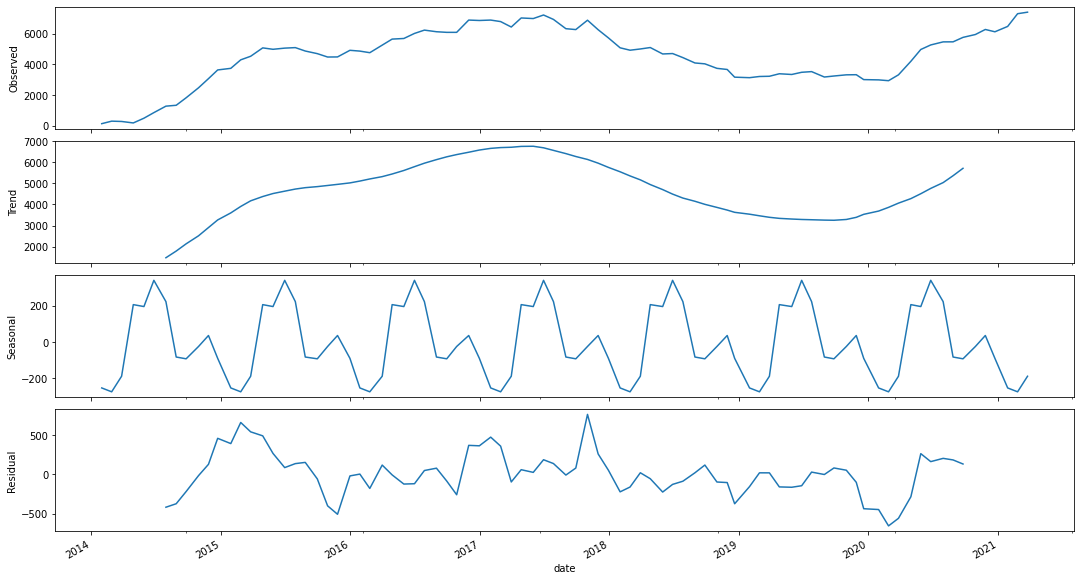

In [ ]:
decomp = seasonal_decompose(data_12_15_months['patients'], freq=12)
fig = decomp.plot()
fig.set_size_inches(15, 8)

### 15-18 Months

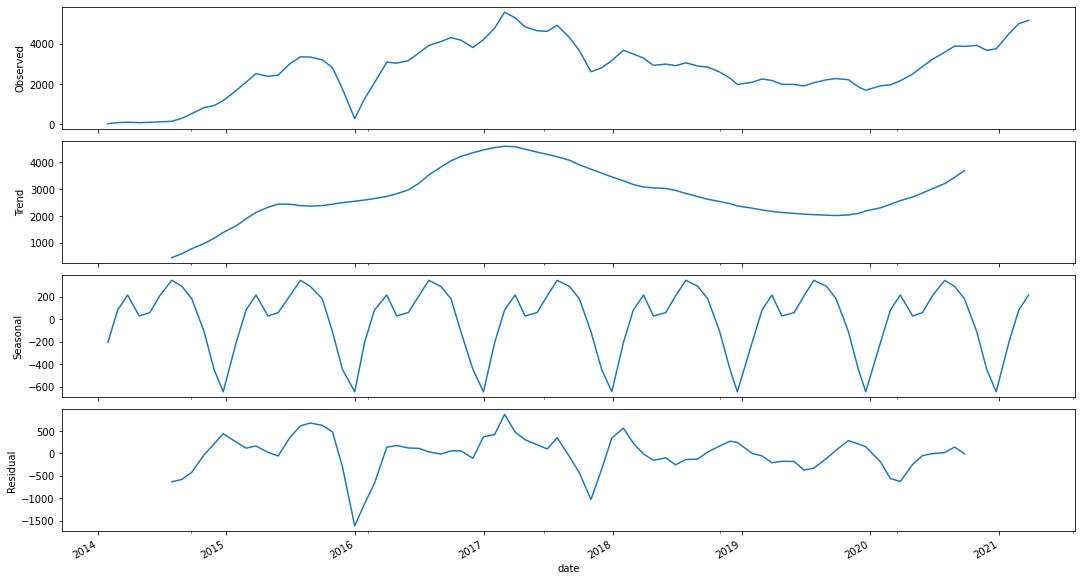

In [ ]:
decomp = seasonal_decompose(data_15_18_months['patients'], freq=12)
fig = decomp.plot()
fig.set_size_inches(15, 8)

### 18+ Months

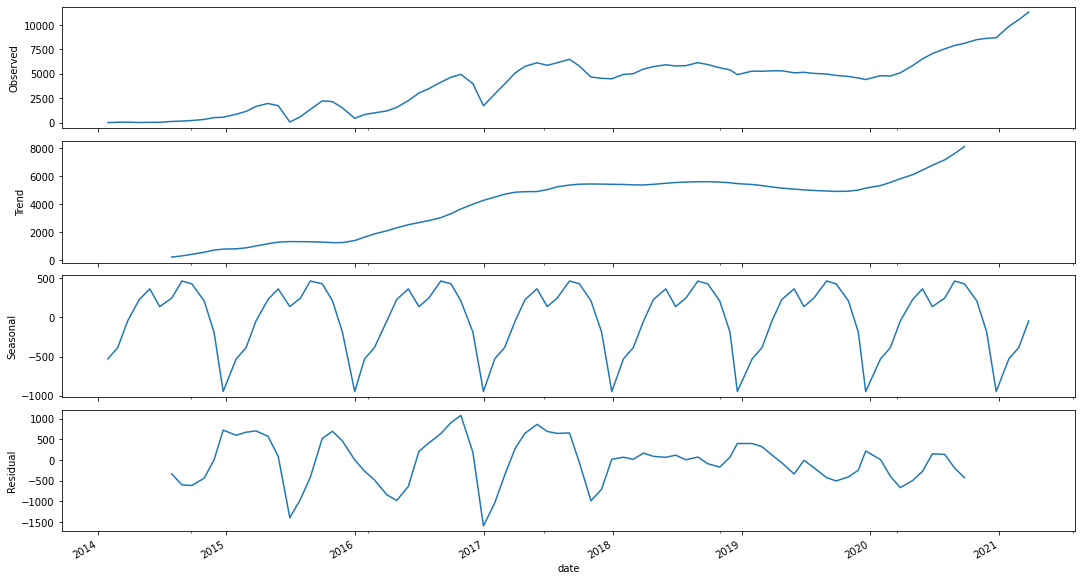

In [ ]:
decomp = seasonal_decompose(data_18_months['patients'], freq=12)
fig = decomp.plot()
fig.set_size_inches(15, 8)

# Modelling
Before Modelling with SARIMAX, we must apply transformations to our time series to remove seasonality and any non-stationary behaviour

Therefore, applying the Dickey-Fuller test to determine if it is a stationary process.

ACF (Auto Correlation Function) explains how the present value of a given time series is correlated with the past values (1-unit past, 2-unit past, ..., n-unit past)
x-axis - correlation coefficient
y-axis - number of lags

PACF (Partial Auto Correlation Function) explains the partial correlation between the series and lags of itself

In [72]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        

### 0-3 Months

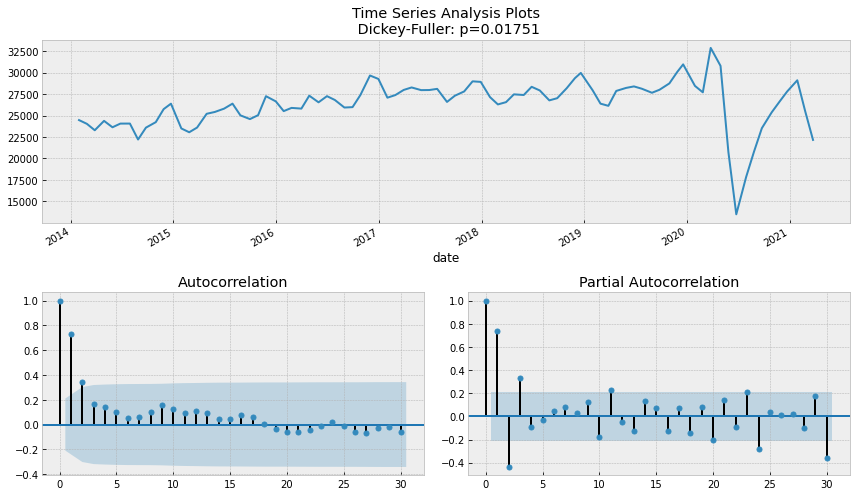

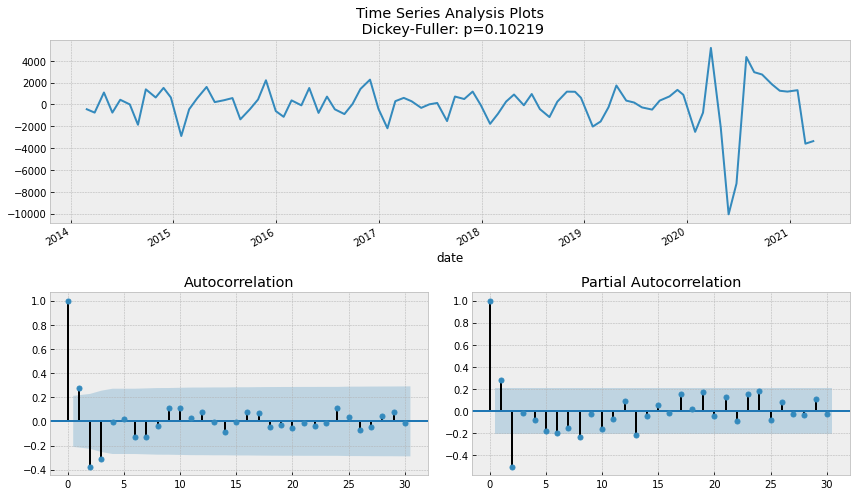

In [73]:
tsplot(data_0_3_months.patients, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data_0_3_months.patients - data_0_3_months.patients.shift(1)

tsplot(data_diff[1:], lags=30)

### 3-6 Months

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


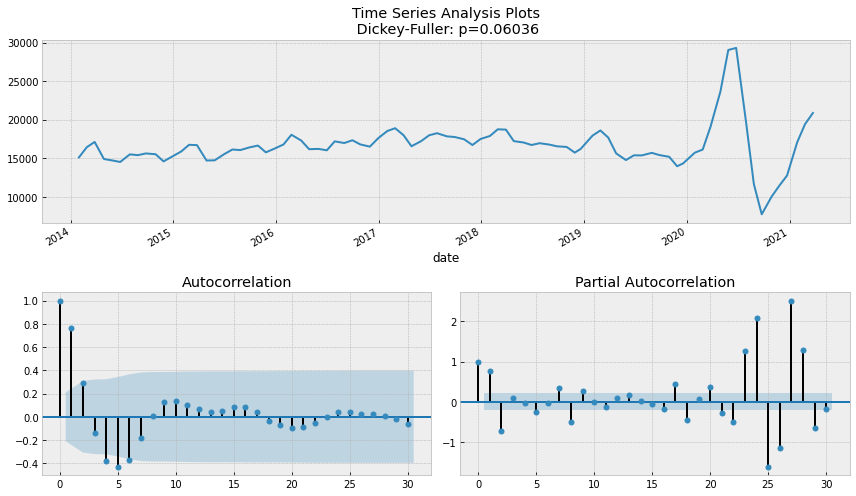

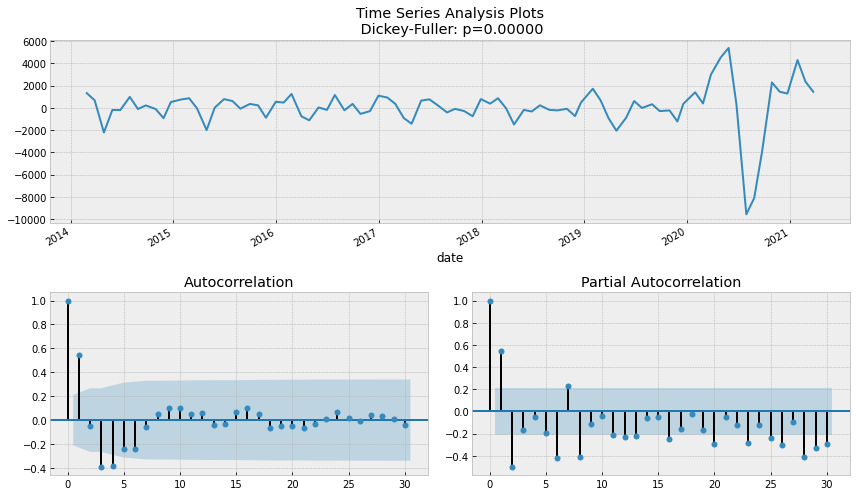

In [74]:
tsplot(data_3_6_months.patients, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data_3_6_months.patients - data_3_6_months.patients.shift(1)

tsplot(data_diff[1:], lags=30)

### 6-9 Months

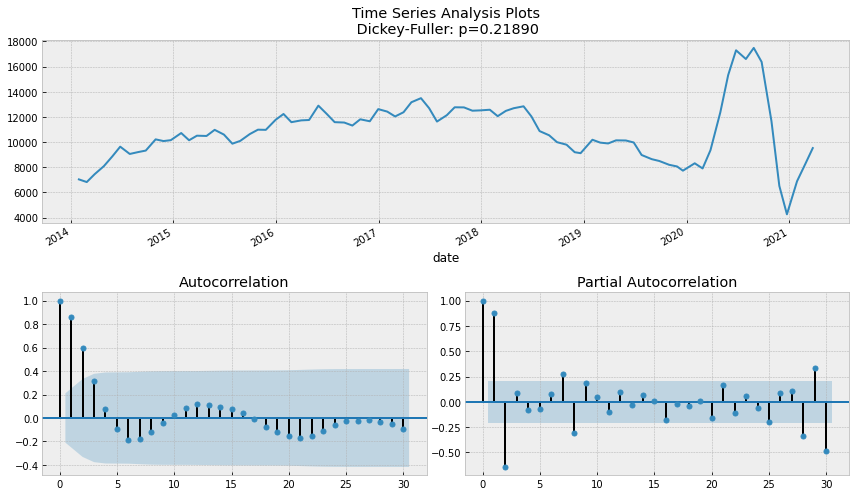

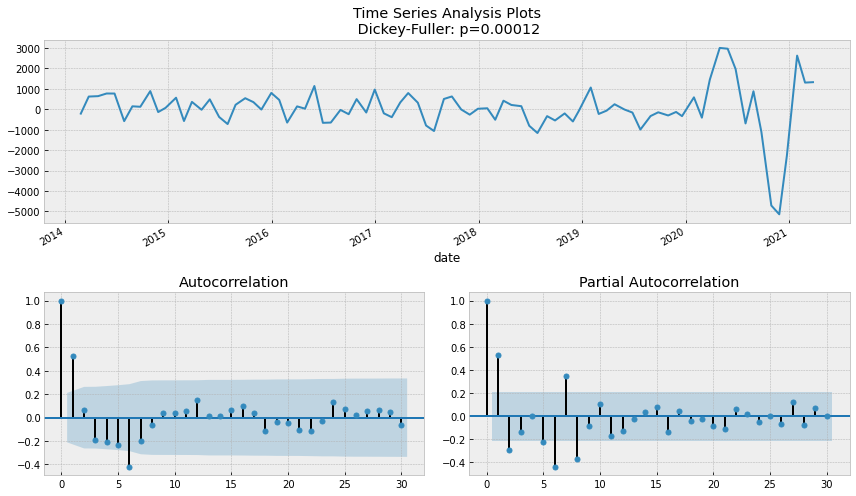

In [75]:
tsplot(data_6_9_months.patients, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data_6_9_months.patients - data_6_9_months.patients.shift(1)

tsplot(data_diff[1:], lags=30)

### 9-12 Months

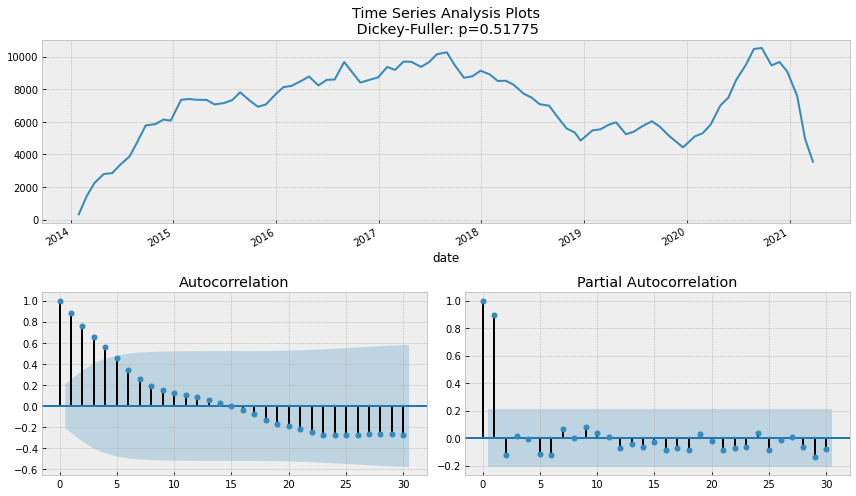

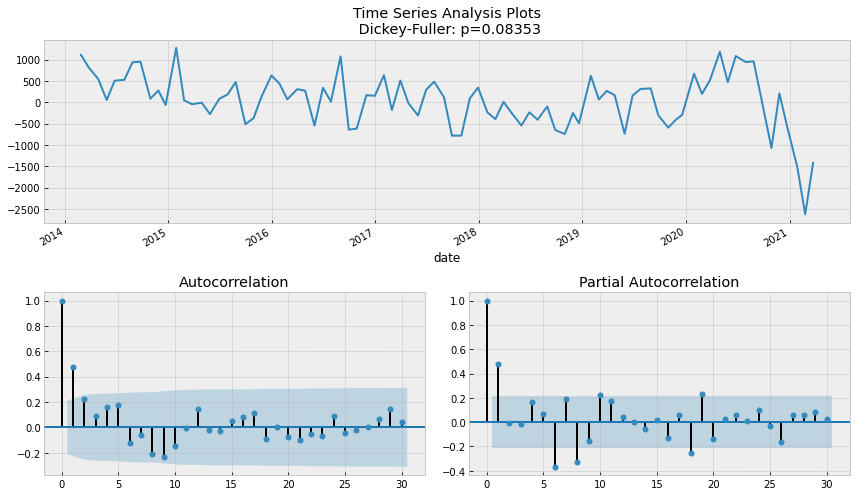

In [76]:
tsplot(data_9_12_months.patients, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data_9_12_months.patients - data_9_12_months.patients.shift(1)

tsplot(data_diff[1:], lags=30)

### 12 -15 Months

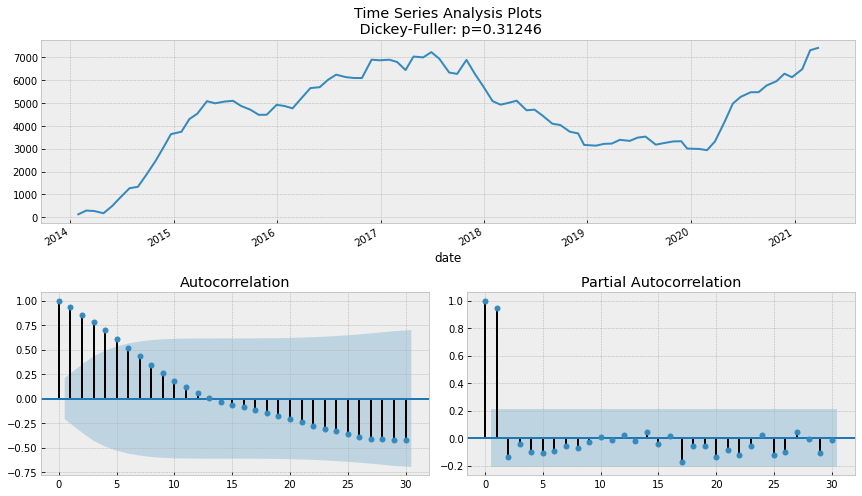

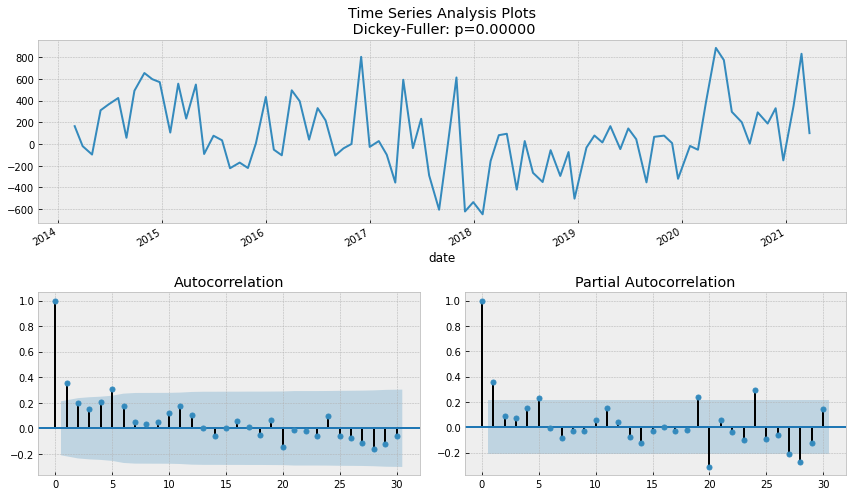

In [77]:
tsplot(data_12_15_months.patients, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data_12_15_months.patients - data_12_15_months.patients.shift(1)

tsplot(data_diff[1:], lags=30)

### 15-18 Months

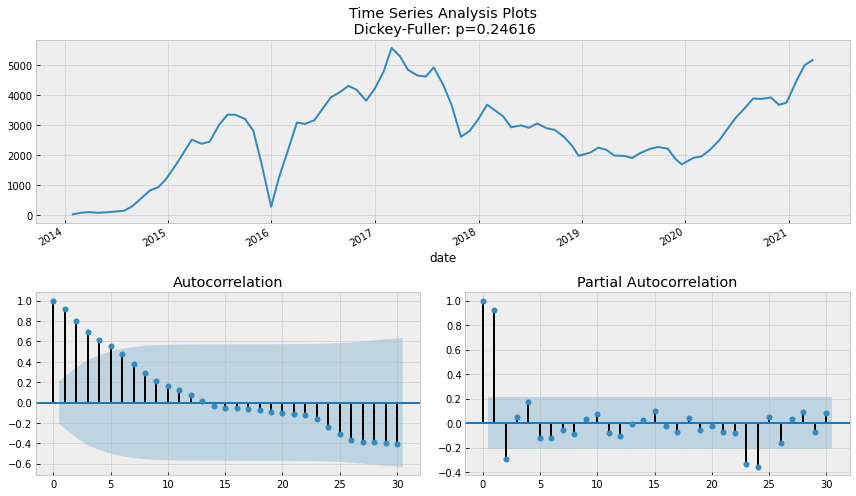

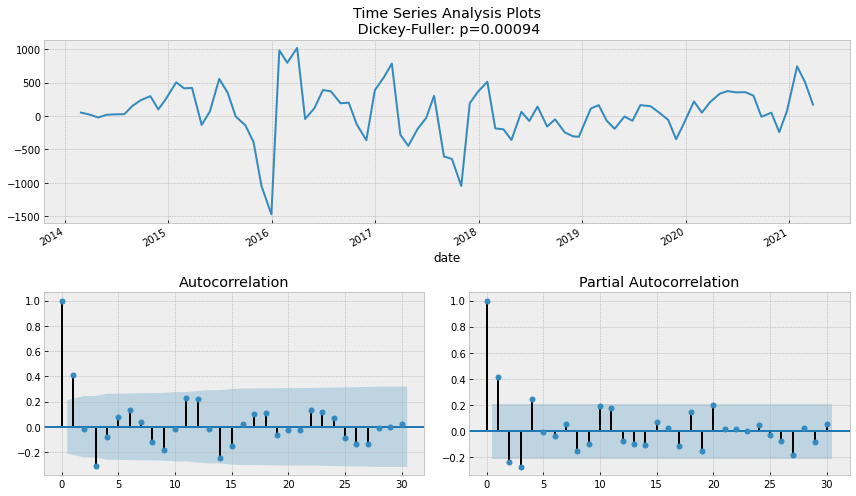

In [78]:
tsplot(data_15_18_months.patients, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data_15_18_months.patients - data_15_18_months.patients.shift(1)

tsplot(data_diff[1:], lags=30)

### 18+ Months

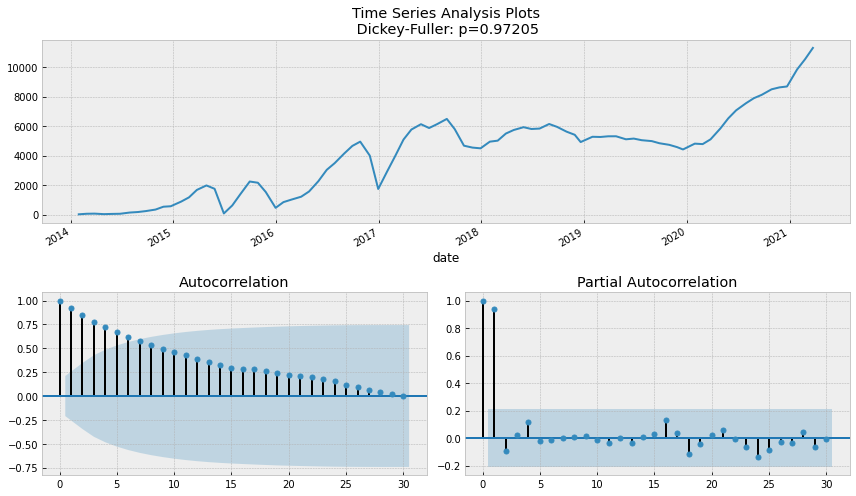

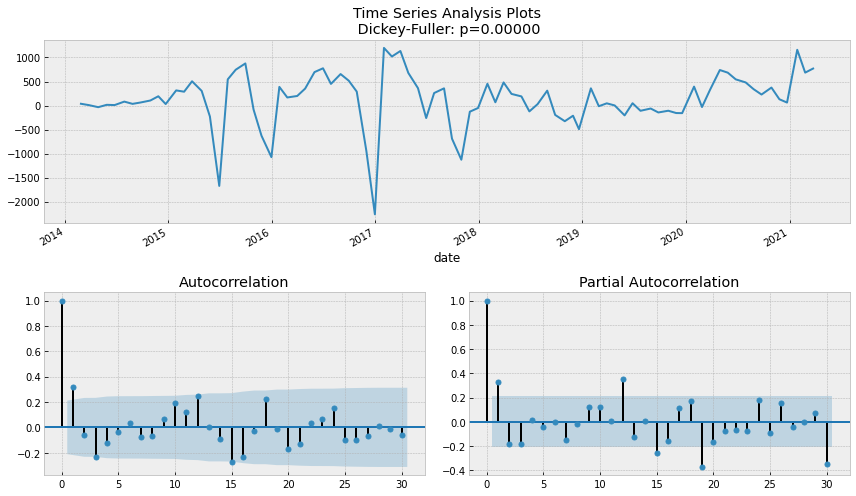

In [79]:
tsplot(data_18_months.patients, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data_18_months.patients - data_18_months.patients.shift(1)

tsplot(data_diff[1:], lags=30)

## SARIMA 

In [ ]:
from tqdm import tqdm_notebook
from itertools import product

# set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

# create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(data_new.patients, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        # save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

# set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(data_new.patients, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/625 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

                                 Statespace Model Results                                
Dep. Variable:                          patients   No. Observations:                   87
Model:             SARIMAX(0, 1, 3)x(2, 1, 0, 5)   Log Likelihood                -520.429
Date:                           Wed, 23 Mar 2022   AIC                           1052.858
Time:                                   20:25:53   BIC                           1067.224
Sample:                                        0   HQIC                          1058.622
                                            - 87                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1371      0.089      1.537      0.124      -0.038       0.312
ma.L2         -0.3938      0.117     -3.352

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
